**Email CNN**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 500, 16)           64        
                                                                 
 batch_normalization_3 (Bat  (None, 500, 16)           64        
 chNormalization)                                                
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 250, 16)           0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 250, 16)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 248, 32)           1568      
                                                                 
 batch_normalization_4 (Bat  (None, 248, 32)          

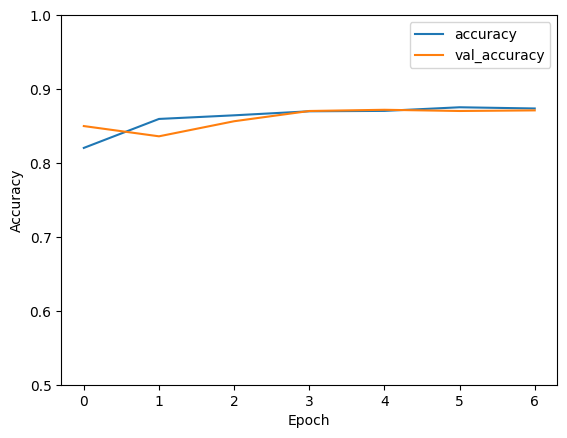

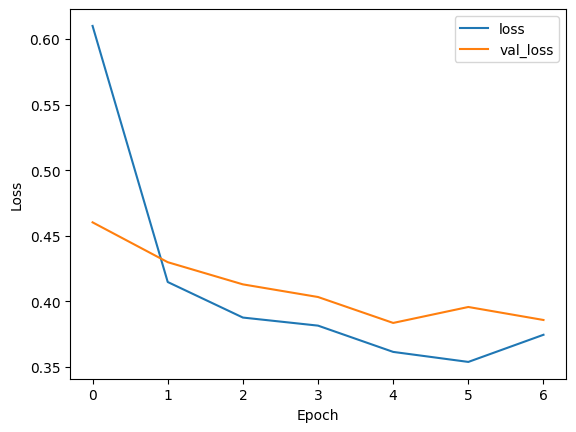

39/39 - 0s - loss: 0.3858 - accuracy: 0.8711 - 302ms/epoch - 8ms/step

CNN Test accuracy: 0.8711256384849548
39/39 [==============================] - 1s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1069
           1       0.48      0.06      0.11       157

    accuracy                           0.87      1226
   macro avg       0.68      0.53      0.52      1226
weighted avg       0.83      0.87      0.83      1226

F1 Score: 0.1124


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Import data
df = pd.read_csv("Spam_Ham_data.csv", encoding="utf-8")

# Preprocess data
texts = df['content'].fillna('').astype(str).tolist()
labels = []
for label in df['label']:
    if label == 0:
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)

# number of words used as features
max_words = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=maxlen)
y = np.array(labels)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Building CNN
model = models.Sequential()

# First Convolutional Layer
model.add(Conv1D(16, 3, activation='relu', padding='same', input_shape=(500,1)))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.35))

# Second Convolutional Layer
model.add(Conv1D(32, 3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.35))

# Third Convolutional Layer
model.add(Conv1D(64, 3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.35))

# Flatten for FCNN layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Binary cross entropy because binary classification
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model and validating w/ test data
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=7, batch_size=64)

# Accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.legend()
plt.show()
print("\n")

# Loss graph
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nCNN Test accuracy:", test_acc)

# Predict classes with the model
y_pred = (model.predict(x_test) > 0.5).astype("int")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred)

# Print  F1 score
print(f"F1 Score: {f1:.4f}")


**SMS CNN**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 500, 16)           64        
                                                                 
 batch_normalization_6 (Bat  (None, 500, 16)           64        
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 250, 16)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 250, 16)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 248, 32)           1568      
                                                                 
 batch_normalization_7 (Bat  (None, 248, 32)          

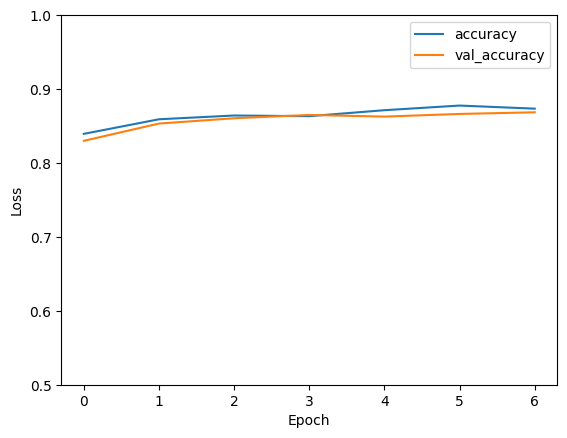

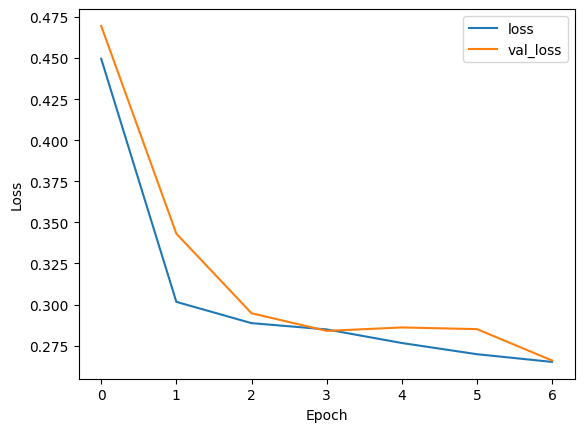

70/70 - 1s - loss: 0.2660 - accuracy: 0.8686 - 542ms/epoch - 8ms/step

CNN Test accuracy: 0.8685508966445923
70/70 [==============================] - 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1930
           1       0.52      0.28      0.36       299

    accuracy                           0.87      2229
   macro avg       0.71      0.62      0.64      2229
weighted avg       0.85      0.87      0.85      2229

F1 Score: 0.3617


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Import data
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

# Preprocess data
texts = df['v2'].fillna('').astype(str).tolist()
labels = []
for label in df['v1']:
    if label == "ham":
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)

# number of words used as features
max_words = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=maxlen)
y = np.array(labels)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Building CNN
model = models.Sequential()

# First Convolutional Layer
model.add(Conv1D(16, 3, activation='relu', padding='same', input_shape=(500,1)))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.3))

# Second Convolutional Layer
model.add(Conv1D(32, 3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.3))

# Third Convolutional Layer
model.add(Conv1D(64, 3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.3))

# Flatten for FCNN layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Binary cross entropy because binary classification
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=7, batch_size=64)

# Accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.legend()
plt.show()
print("\n")

# Loss graph
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nCNN Test accuracy:", test_acc)

# Predict classes with the model
y_pred = (model.predict(x_test) > 0.5).astype("int")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred)

# Print  F1 score
print(f"F1 Score: {f1:.4f}")
